In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from IPython.display import display

pd.set_option('display.max_columns', 32)
plt.rc('figure', dpi=200)                                     #we want a great plot resolution for decent HTML/PDF exports

In [182]:
def isnumber(x):
    try:
        float(x)
        return True
    except: return False

['results/P000_210726_185903.csv',
 'results/P001_210726_165407.csv',
 'results/P002_210705_194653.csv',
 'results/P003_210708_183840.csv',
 'results/P004_210714_163627.csv',
 'results/P005_210716_183735.csv',
 'results/P006_210720_140124.csv',
 'results/P007_210720_175638.csv',
 'results/P008_210721_151852.csv',
 'results/P009_210722_144459.csv',
 'results/P010_210722_174527.csv']

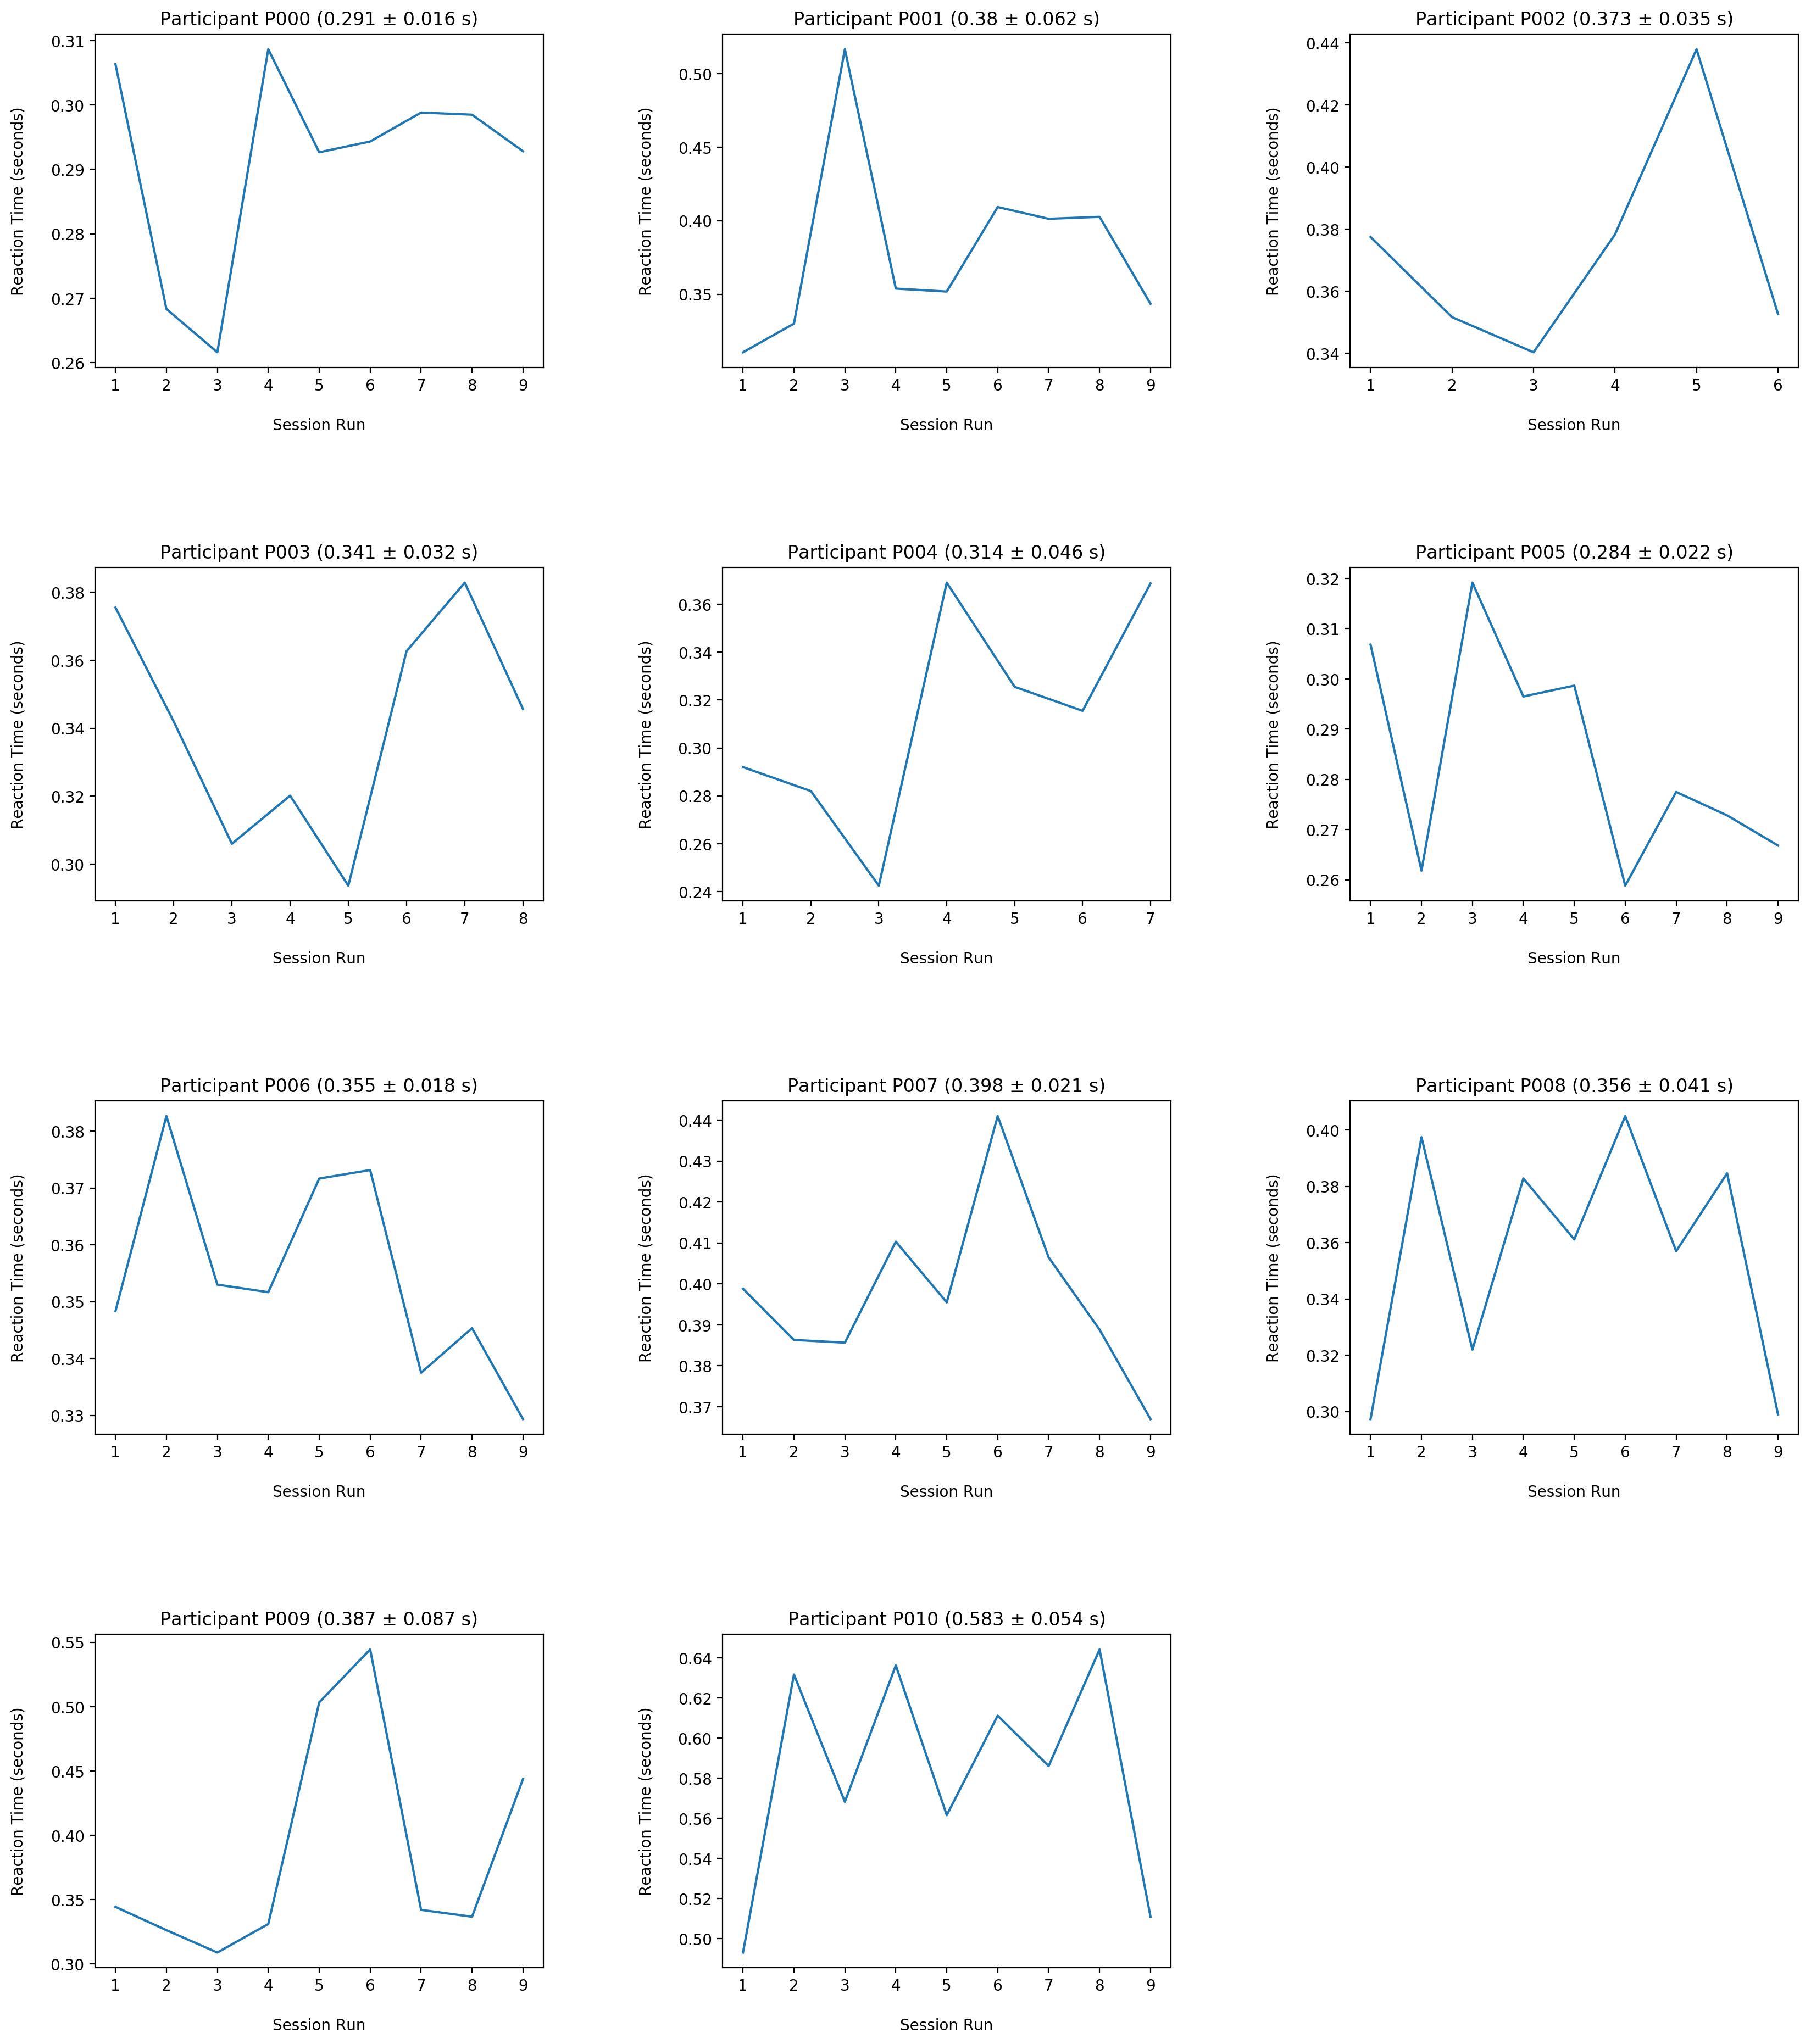

In [209]:
filenames = [s.replace('\\', '/') for s in sorted(glob.glob('results/P*_*_*.csv'))]
display(filenames)
print('\n')

scores, score_mean, score_std, score_range = {}, {}, {}, {}

fig = plt.figure(figsize=(20, 22))
fig.tight_layout()

for i in range(len(filenames)):
    results = pd.read_csv(filenames[i], header=None)[1:]
#     display(results)
    
    only_numeric_results = results[results.applymap(isnumber)].astype(float).dropna(how='all')
    
    scores[i] = only_numeric_results.mean(axis=1)

    score_mean[i]  = scores[i].mean()
    score_std[i]   = scores[i].std()
    score_range[i] = scores[i].max() - scores[i].min()
    
    
    plt.subplot(4, 3, i+1)
    plt.title(f"Participant P{str(i).zfill(3)} ({np.round(score_mean[i], 3)} ± {np.round(score_std[i], 3)} s)")    #  (range {np.round(score_range[i], 3)})")
    plt.xlabel("\nSession Run")
    plt.ylabel("Reaction Time (seconds)\n")
    plt.plot(scores[i])

plt.subplots_adjust(bottom=0.1, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

In [184]:
# n_participant = 9
# average_mean, average_std, average_range = score_mean[n_participant], score_std[n_participant], score_range[n_participant]

average_mean, average_std, average_range = np.mean(list(score_mean.values())), np.mean(list(score_std.values())), np.mean(list(score_range.values()))

print(f"Average: {np.round(average_mean, 3)} ± {np.round(average_std, 3)} (range {np.round(average_range, 3)})\n")
print(f"Average change: ± {np.round((average_mean-average_range) / (average_mean+average_range) * 100 / 2, 1)}%")

Average: 0.369 ± 0.039 (range 0.114)

Average change: ± 26.5%
